In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
import mlxtend.frequent_patterns as pm

from data import *
from funcs import *
from pattern_functions import *

# Heart Failure

In [2]:
hf_data = get_hf_data(feature_selection=True).drop(columns=["DEATH_EVENT"])
labels = range(40, 100, 5)
hf_data['age'] = pd.cut(hf_data['age'], 12, labels, precision=0)
hf_data['creatinine_phosphokinase'] = pd.cut(hf_data['creatinine_phosphokinase'], 8, labels, precision=0)
hf_data['ejection_fraction'] = pd.cut(hf_data['ejection_fraction'], 12, labels, precision=0)
hf_data['platelets'] = pd.cut(hf_data['platelets'], 9, labels, precision=0)
hf_data['serum_creatinine'] = pd.cut(hf_data['serum_creatinine'], 9, labels, precision=0)
hf_data['serum_sodium'] = pd.cut(hf_data['serum_sodium'], 8, labels, precision=0)

hf_data['sex'] = hf_data['sex'].astype('category')
hf_data['sex'] = hf_data['sex'].map({1: 'Male', 0: 'Female'})
hf_data = pd.get_dummies(hf_data)
hf_data.shape

(299, 64)

## Patterns

Processing 36 combinations | Sampling itemset size 98 7
9601 patterns


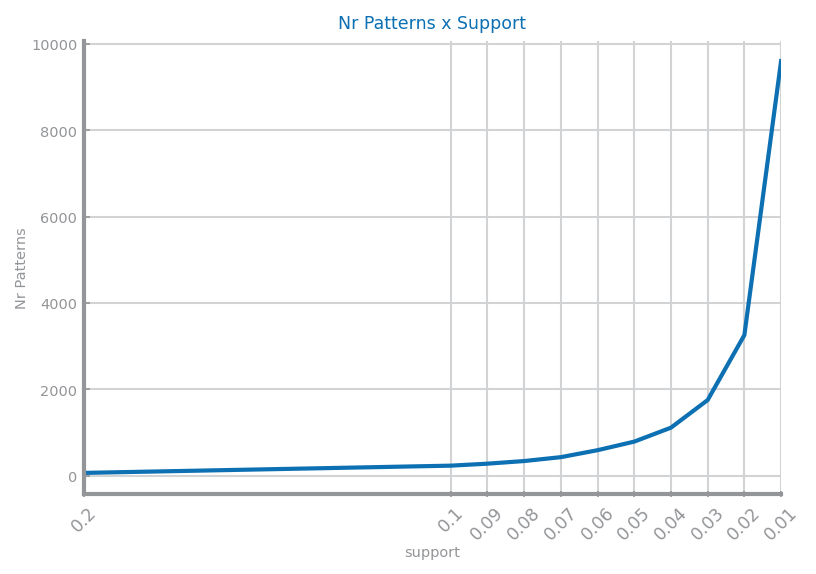

In [3]:
MIN_SUP: float = 0.01
var_min_sup =[0.2] + [i*MIN_SUP for i  in range(10, 0, -1)]
patterns, var_min_sup = get_patterns(hf_data, MIN_SUP, var_min_sup)

## Association Rules

In [4]:
MIN_CONF: float = 0.1
rules = pm.association_rules(patterns, metric='confidence', min_threshold=MIN_CONF*5, support_only=False)
print(f'\tfound {len(rules)} rules')

	found 40844 rules


## Quality evaluation per support

Analyse per support...


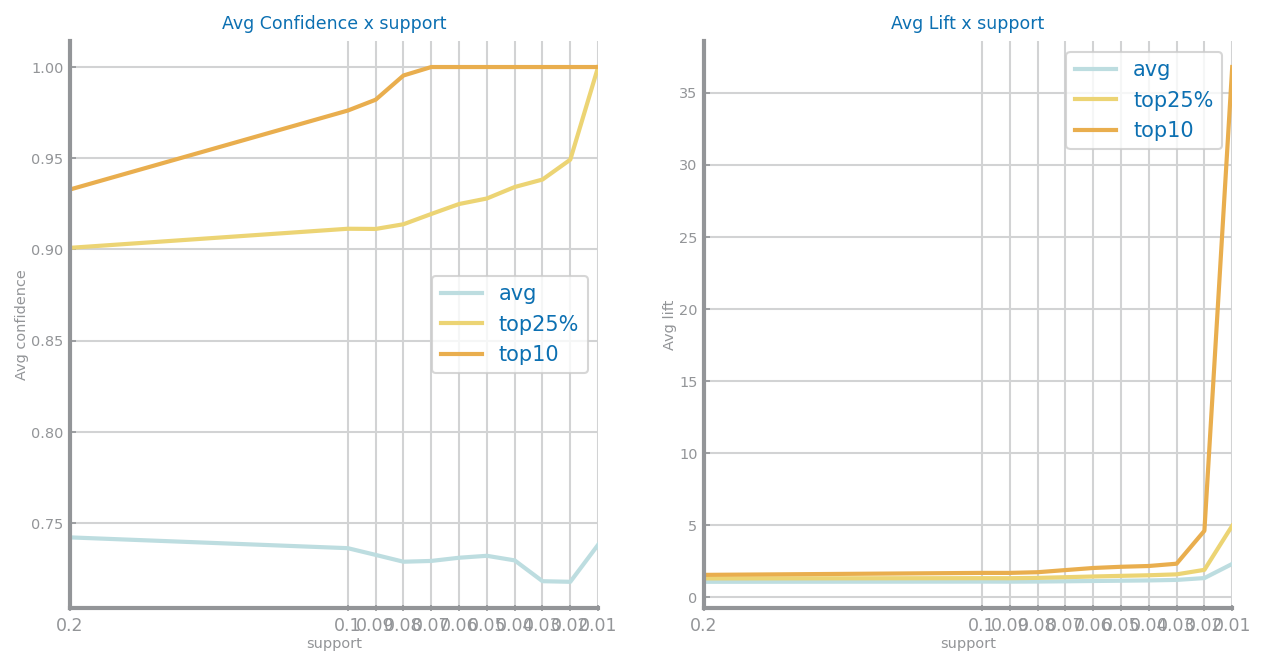

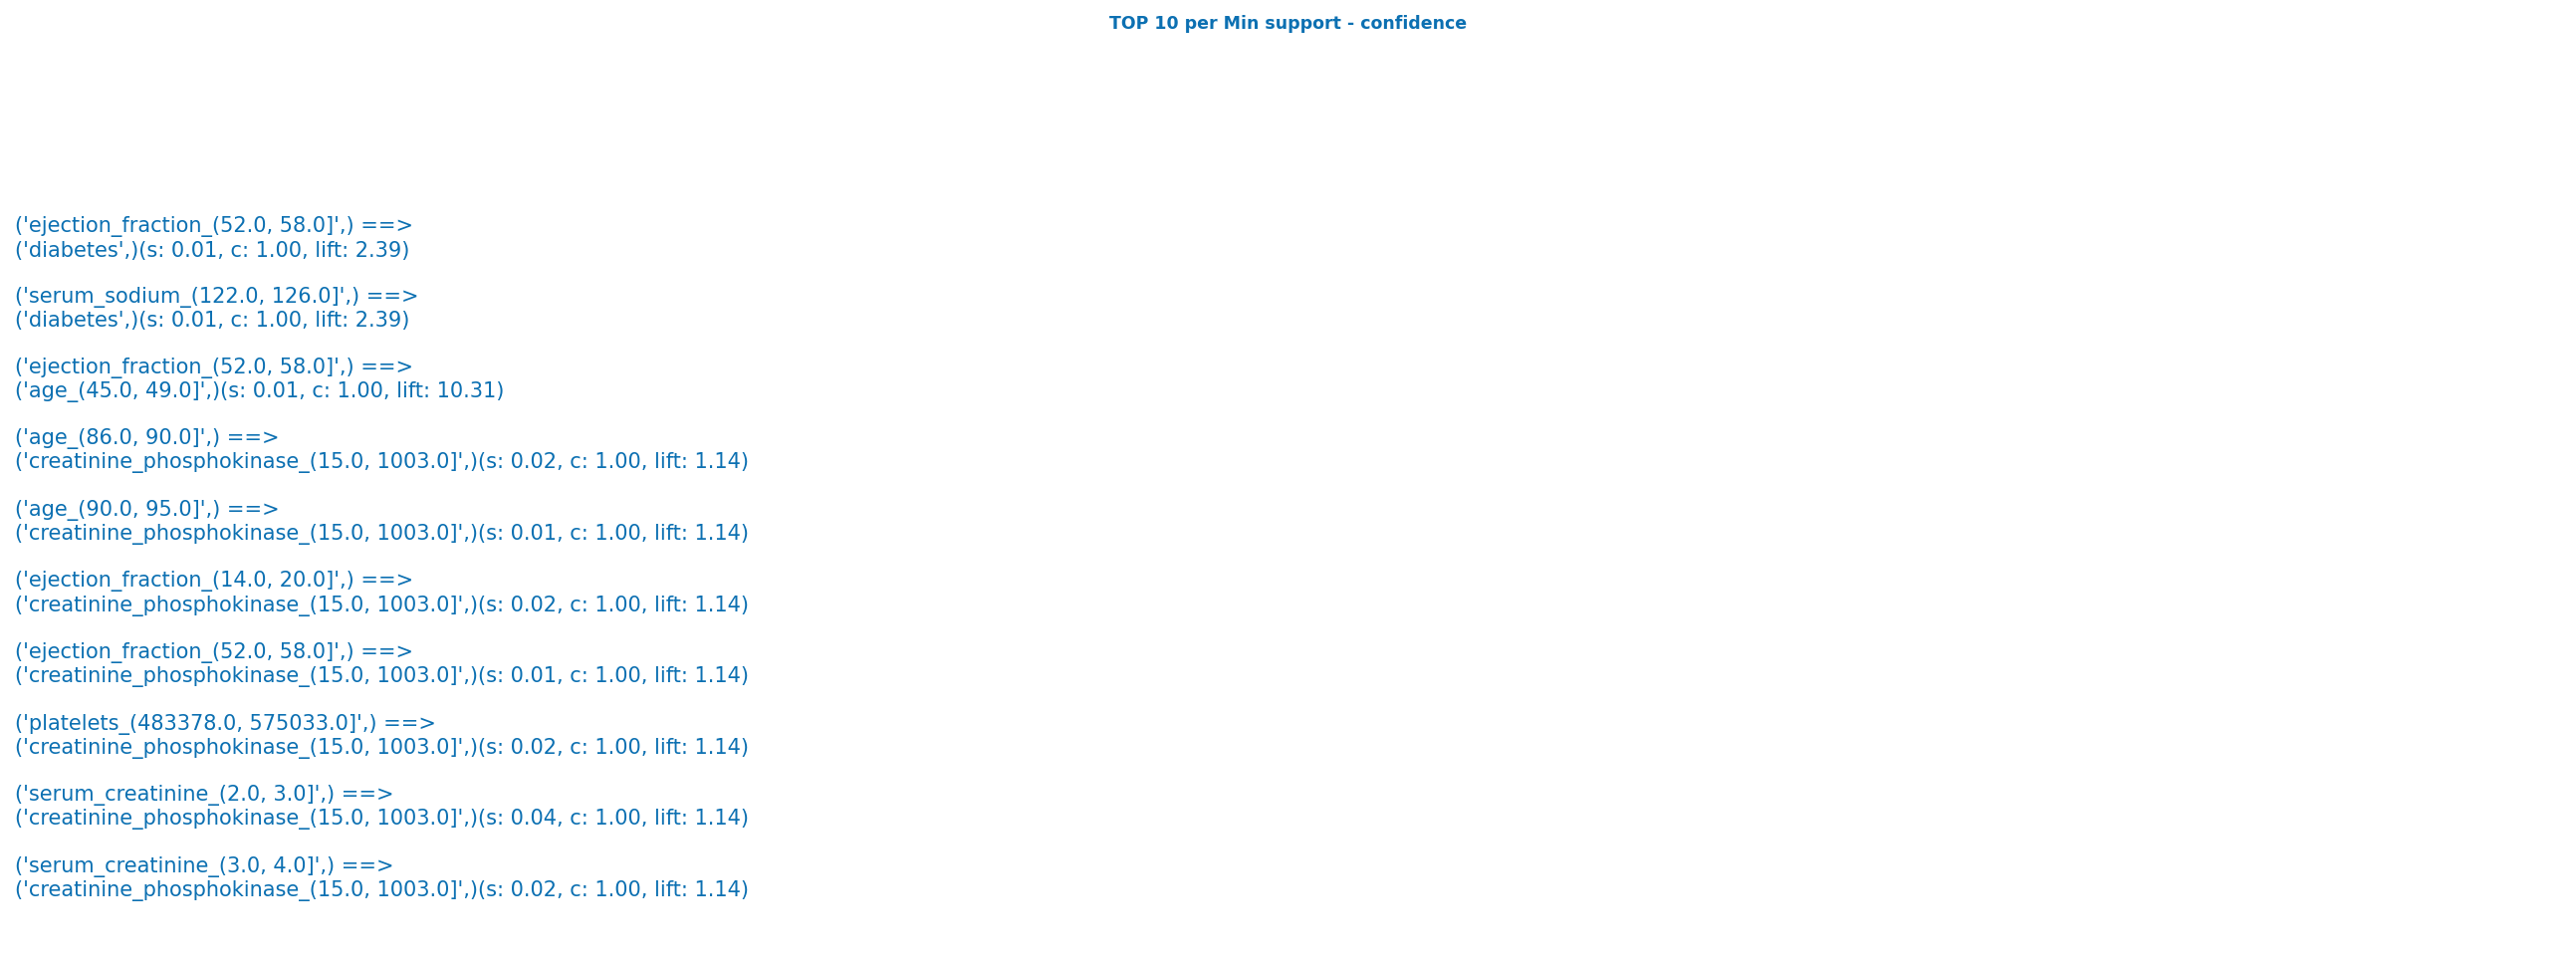

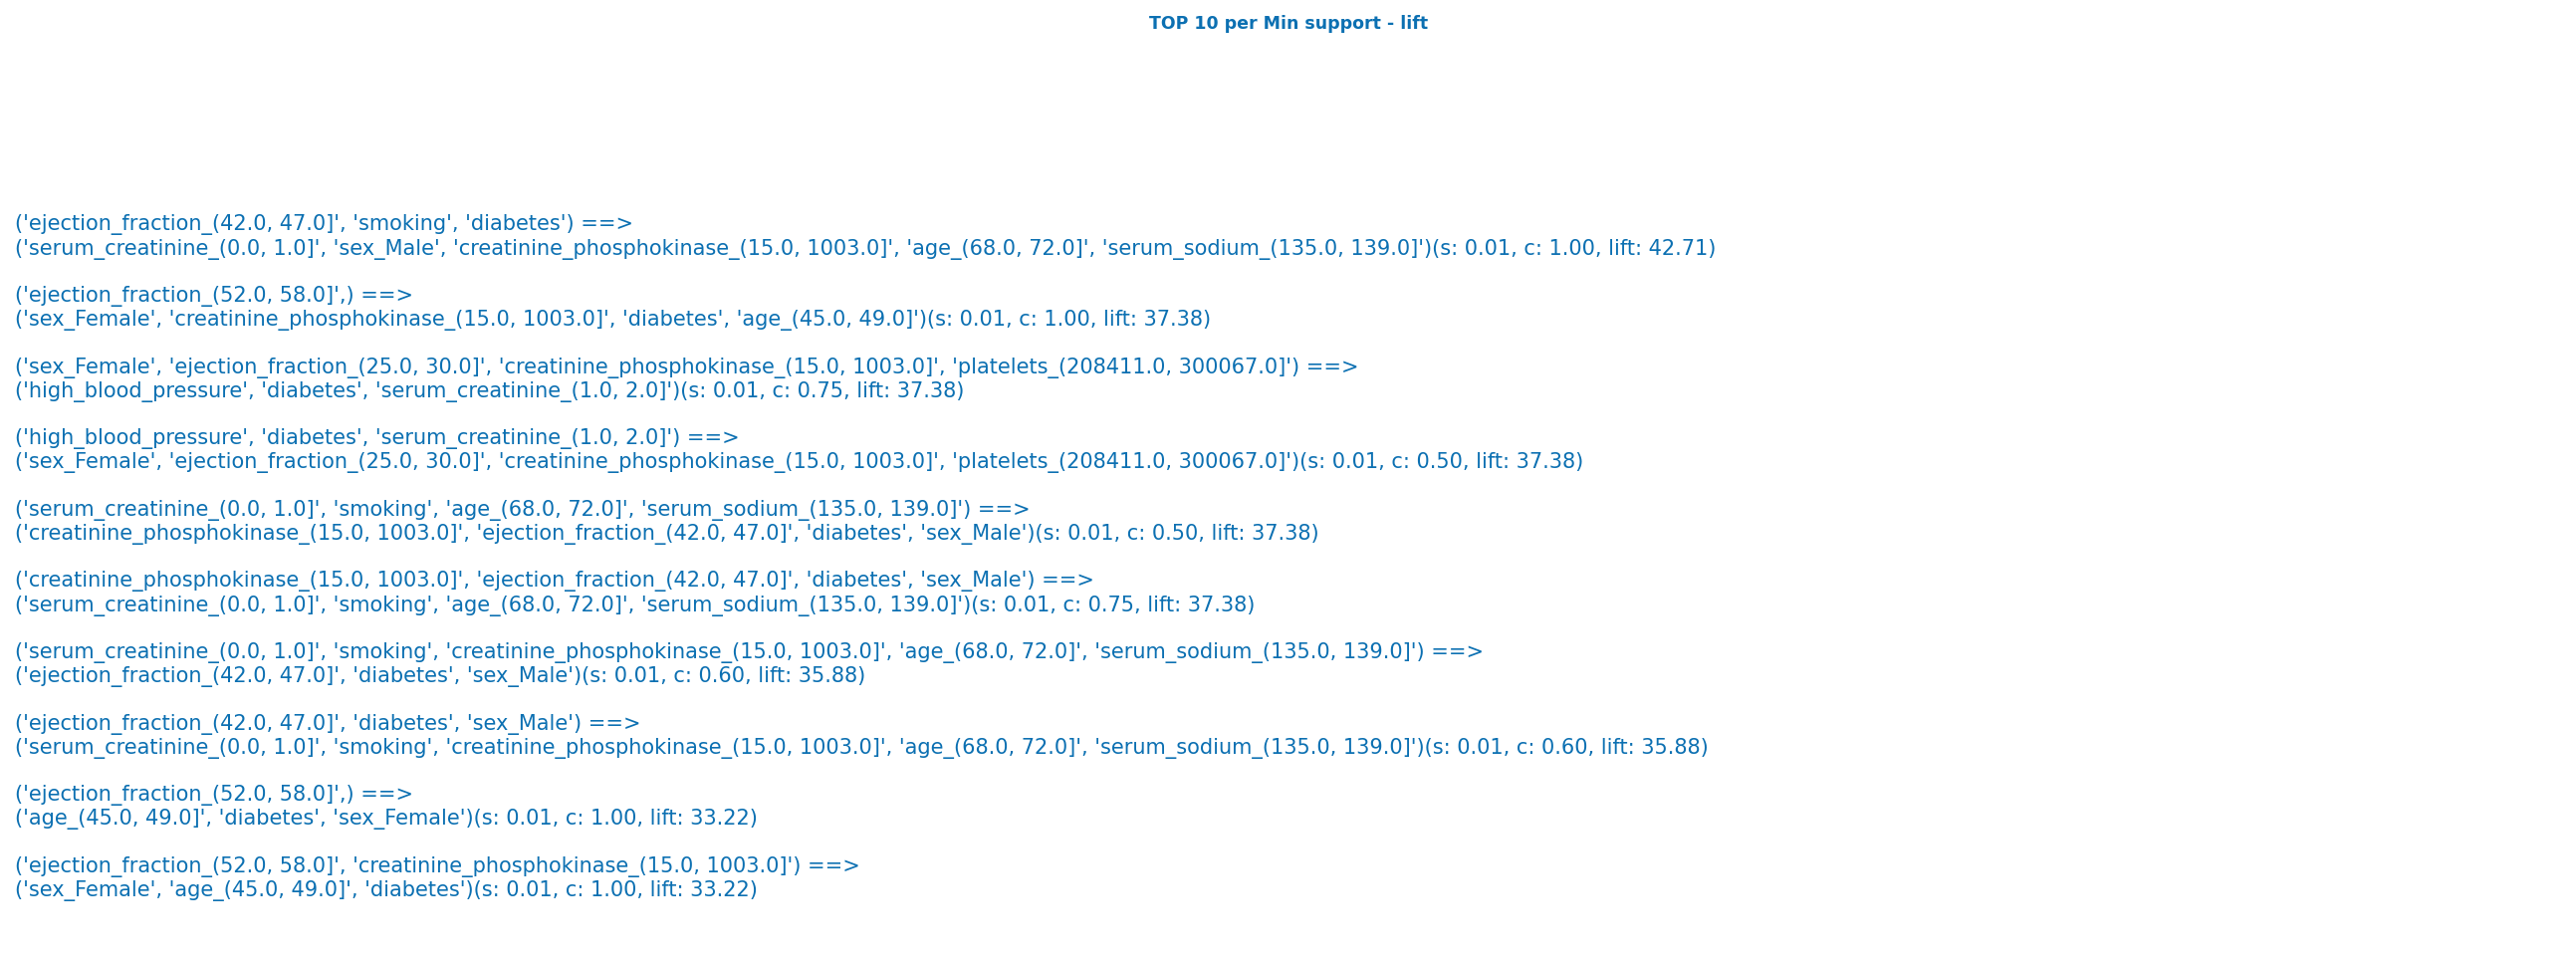

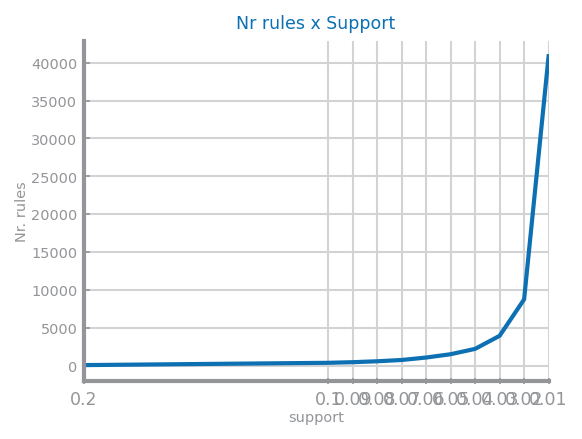

In [5]:
nr_rules_sp = analyse_per_metric(rules, 'support', var_min_sup)
ds.plot_line(var_min_sup, nr_rules_sp, title='Nr rules x Support', xlabel='support', ylabel='Nr. rules', percentage=False)

## Quality evaluation per confidence

Analyse per confidence...


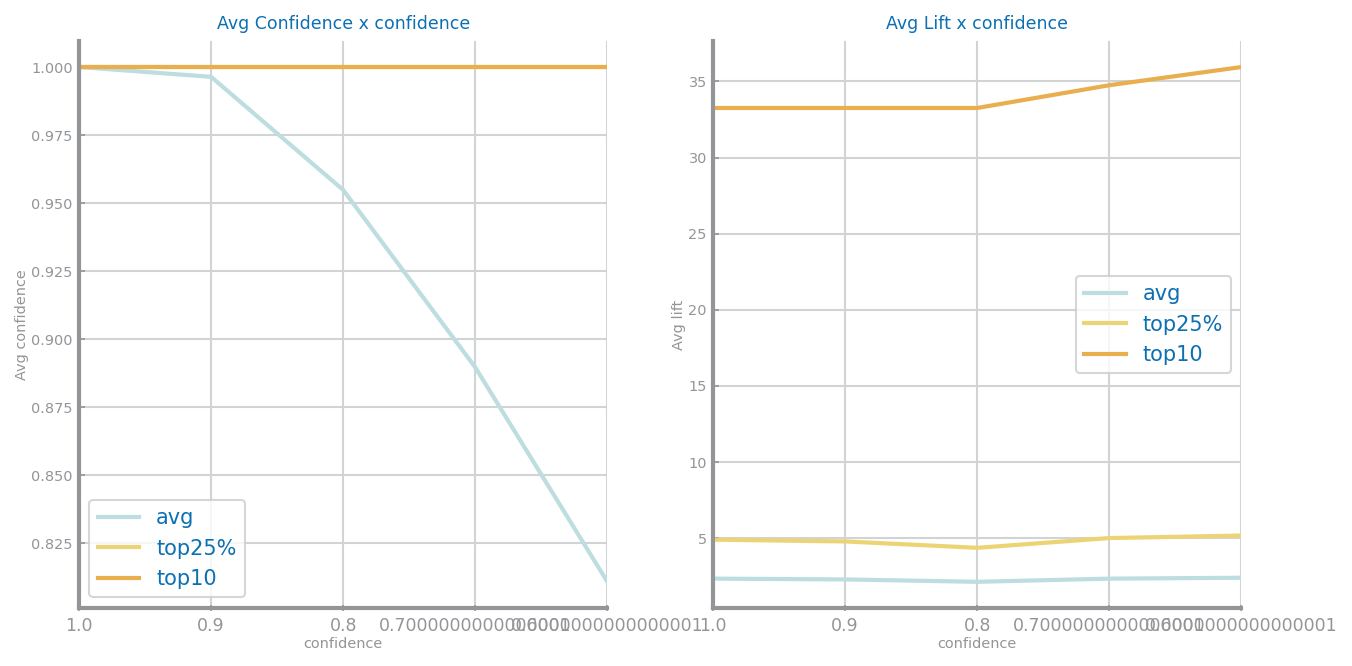

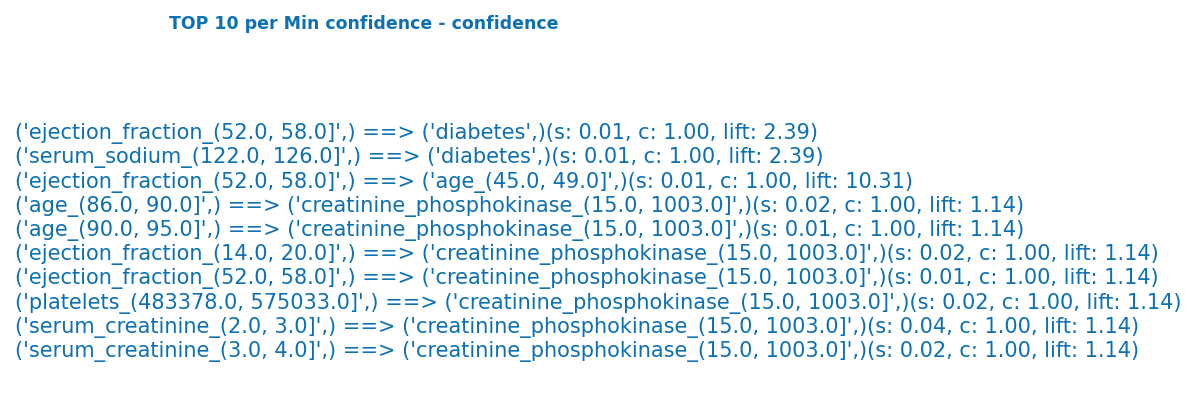

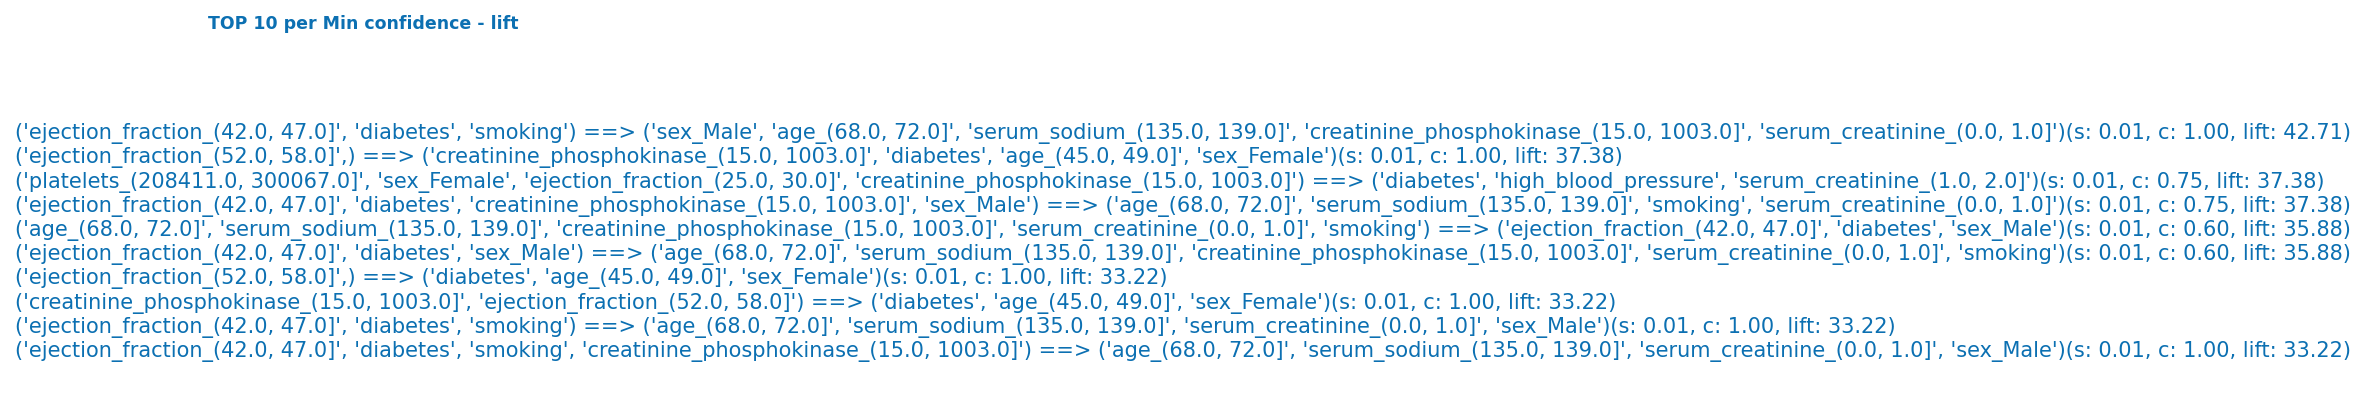

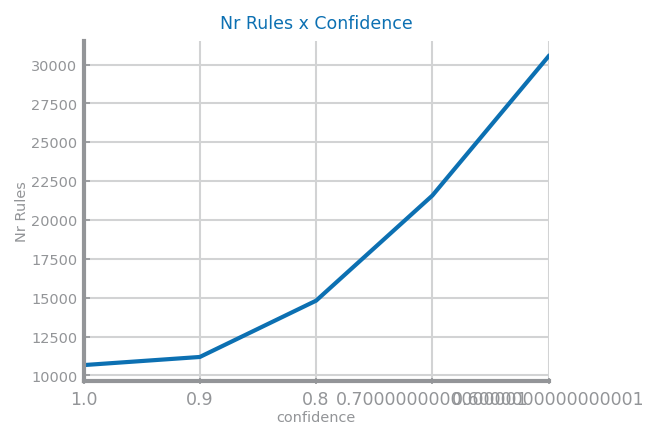

In [29]:
var_min_conf = [i * MIN_CONF for i in range(10, 5, -1)]
nr_rules_cf = analyse_per_metric(rules, 'confidence', var_min_conf)
ds.plot_line(var_min_conf, nr_rules_cf, title='Nr Rules x Confidence', xlabel='confidence', ylabel='Nr Rules', percentage=False)

# Toxicity

In [2]:
t_data = get_t_data().drop(columns=["toxic"])
t_data.columns = t_data.columns.map(str)
t_data.shape

(8992, 1024)

## Patterns

In [15]:
MIN_SUP: float = 0.01
var_min_sup =[0.2] + [i*MIN_SUP for i  in range(10, 0, -1)]
patterns, var_min_sup = get_patterns(t_data, MIN_SUP, var_min_sup)

Processing 1037342 combinations | Sampling itemset size 2

MemoryError: Unable to allocate 69.5 GiB for an array with shape (518671, 2, 8992) and data type int64

Processing 9 combinations | Sampling itemset size 9876
579 patterns


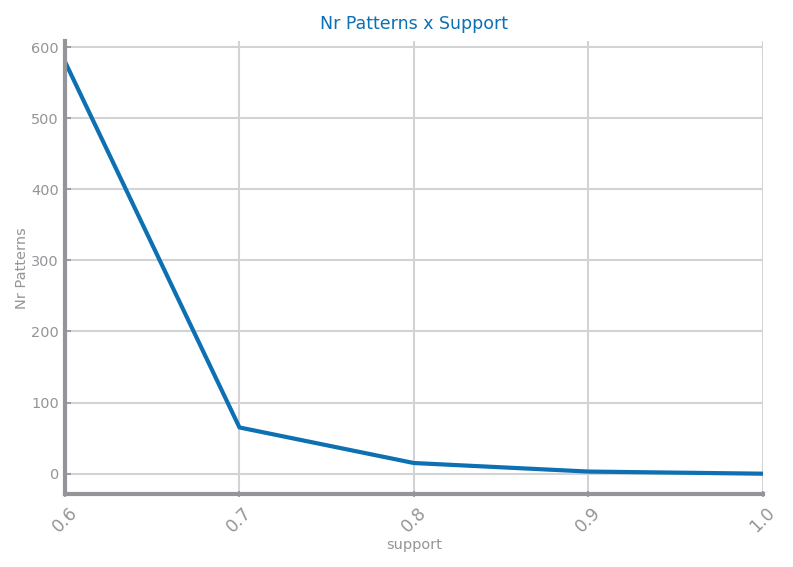

In [3]:
MIN_SUP: float = 0.6
var_min_sup = np.arange(MIN_SUP*10, 11, 1)/10
patterns, var_min_sup = get_patterns(t_data, MIN_SUP, var_min_sup)

## Association Rules

In [4]:
MIN_CONF: float = 0.1
rules = pm.association_rules(patterns, metric='confidence', min_threshold=MIN_CONF*5, support_only=False)
print(f'\tfound {len(rules)} rules')

	found 12450 rules


## Quality evaluation per support

Analyse per support...


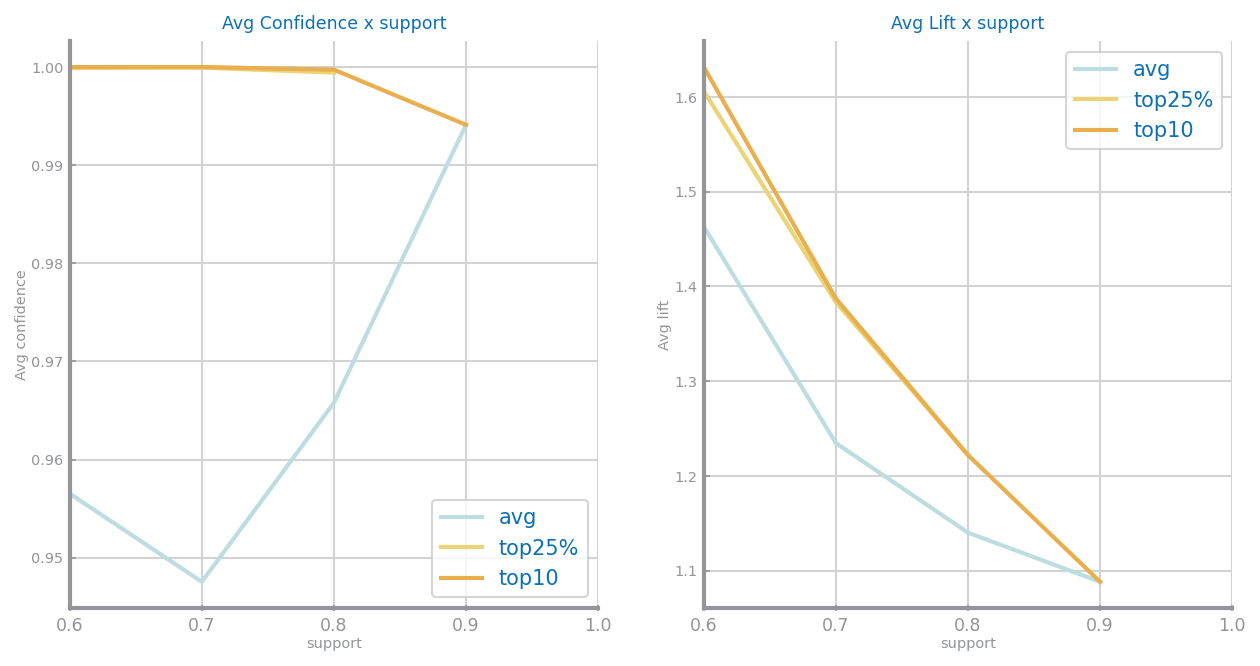

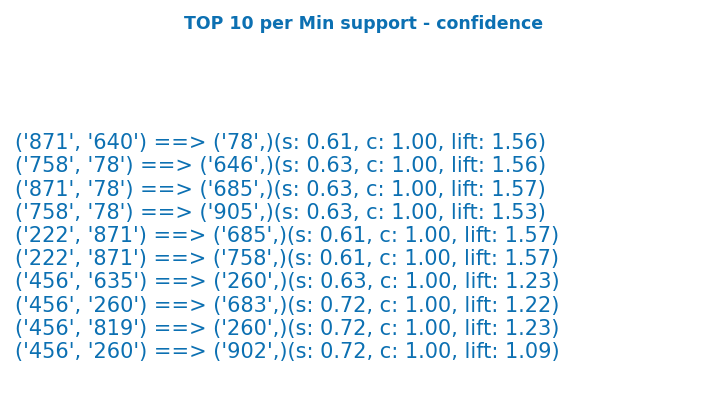

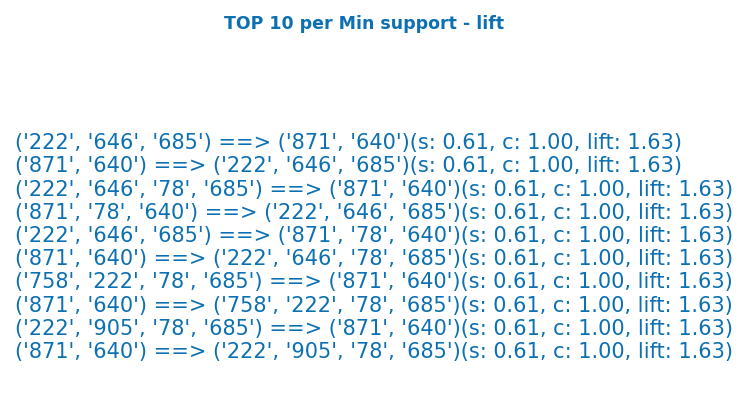

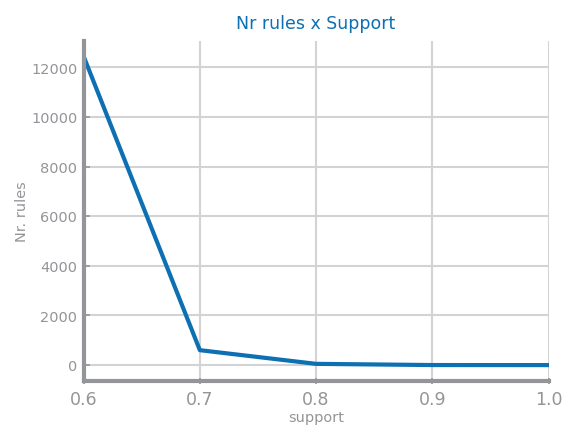

In [5]:
nr_rules_sp = analyse_per_metric(rules, 'support', var_min_sup)
ds.plot_line(var_min_sup, nr_rules_sp, title='Nr rules x Support', xlabel='support', ylabel='Nr. rules', percentage=False)

## Quality evaluation per confidence

Analyse per confidence...


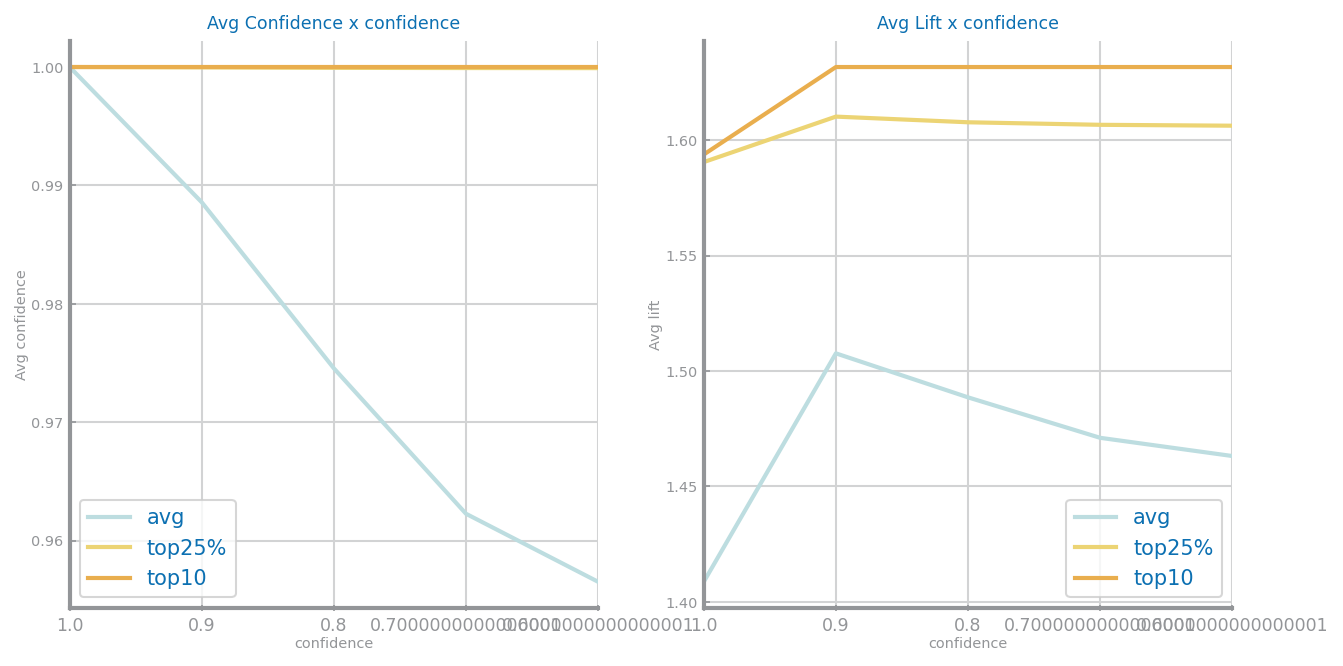

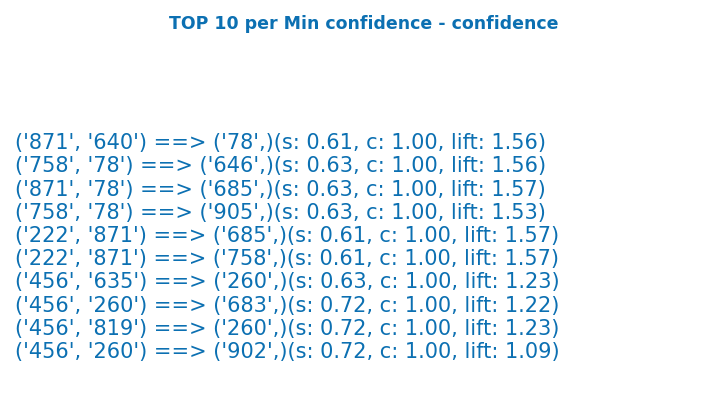

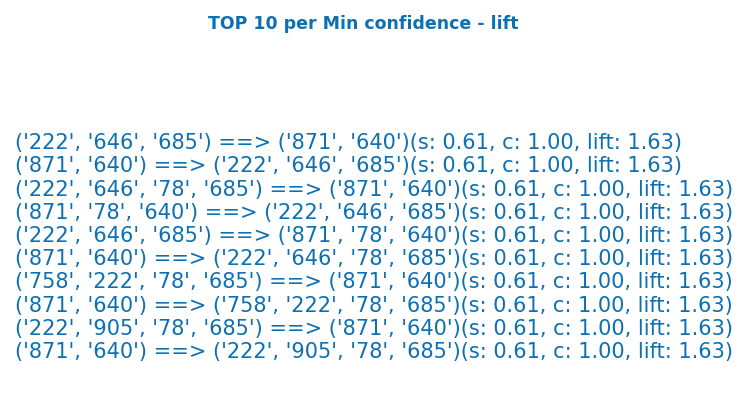

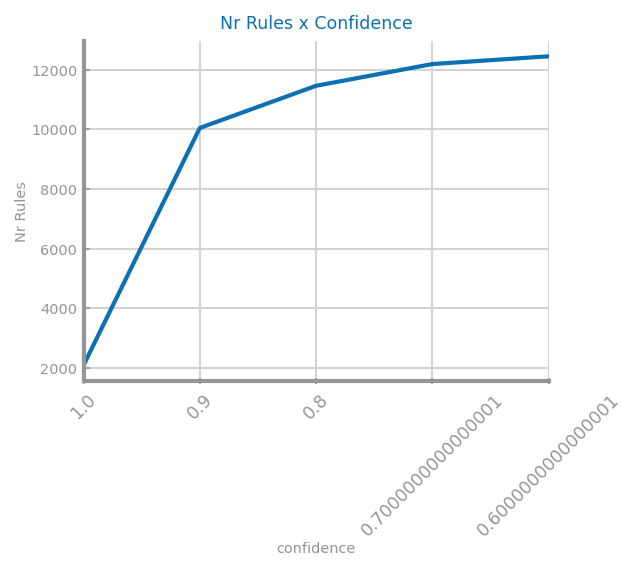

In [6]:
var_min_conf = [i * MIN_CONF for i in range(10, 5, -1)]
nr_rules_cf = analyse_per_metric(rules, 'confidence', var_min_conf)
ds.plot_line(var_min_conf, nr_rules_cf, title='Nr Rules x Confidence', xlabel='confidence', ylabel='Nr Rules', percentage=False, rotation=45)